In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.inspection import permutation_importance
from tabulate import tabulate
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [155]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [156]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [157]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [159]:
df.describe(include=np.number, exclude=None)

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


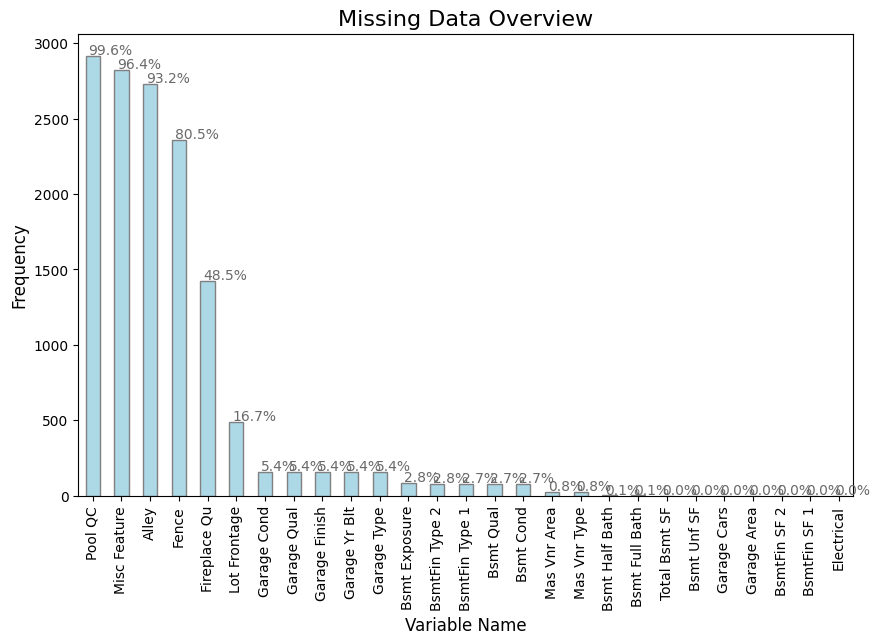

In [160]:
def plot_missing_data(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)

    fig, ax = plt.subplots(figsize=(10, 6))
    missing.plot(kind='bar', ax=ax, color='lightblue', edgecolor='gray')

    ax.set_title("Missing Data Overview", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_xlabel("Variable Name", fontsize=12)

    # Set frequency text
    for i in ax.patches:
        ax.text(i.get_x() + 0.1, i.get_height() + 10,
                str(round((i.get_height() / len(df)) * 100, 1)) + '%', fontsize=10,
                color='dimgrey')

    plt.xticks(rotation=90)
    plt.show()

plot_missing_data(df)

In [161]:
# Drop columns with more than 50% null values
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

In [162]:
nan_counts = df.isna().sum()

# Display all columns and their NaN counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_counts)

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF 

In [163]:
data_types = df.dtypes

# Print or inspect the data types
print(data_types)

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 76, dtype: object


In [164]:
object_columns = data_types[data_types == 'object'].index
int_columns = data_types[data_types.isin(['int64', 'float'])].index
#flt_columns = data_types[data_types == 'float'].index

print("Object columns:", object_columns)
print("Integer & float columns:", int_columns)
#print("float columns:", flt_columns)

Object columns: Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')
Integer & float columns: Index(['PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Open Porch SF',

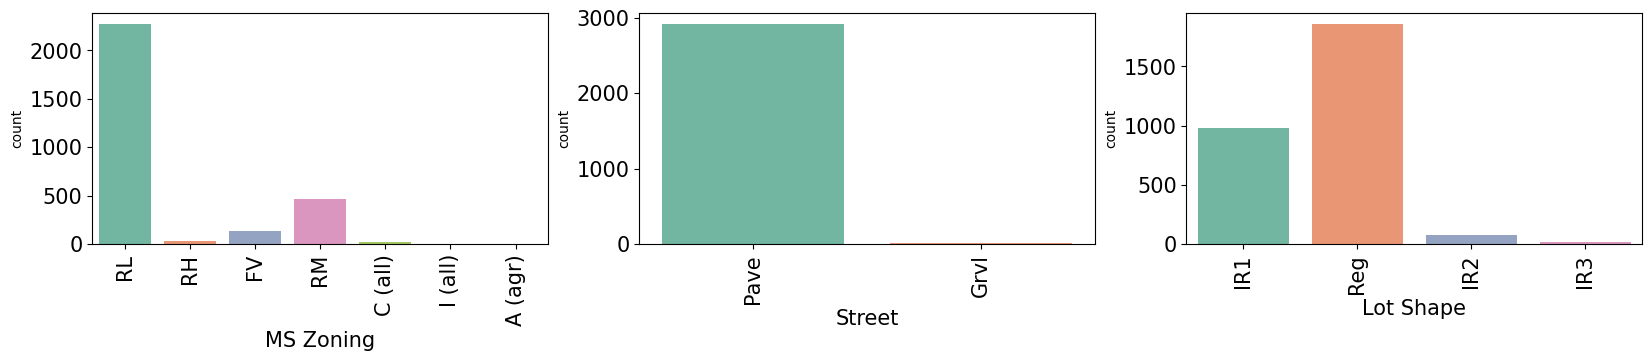

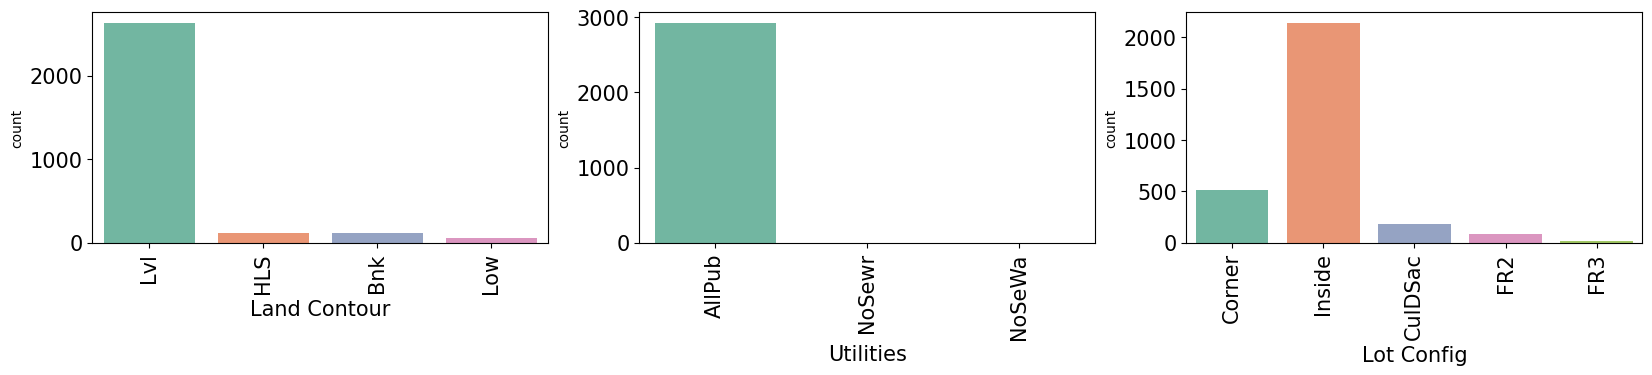

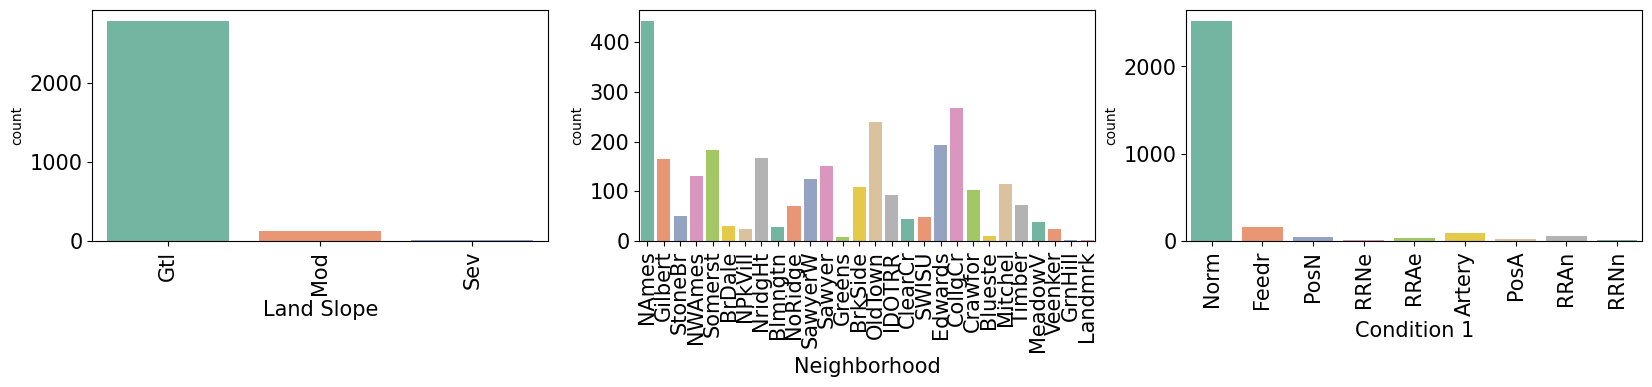

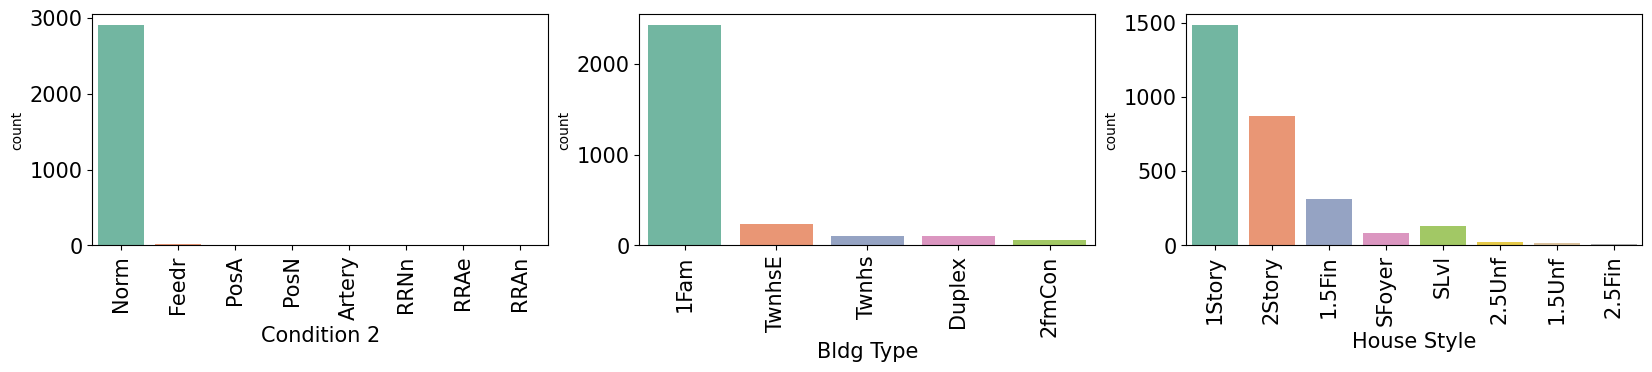

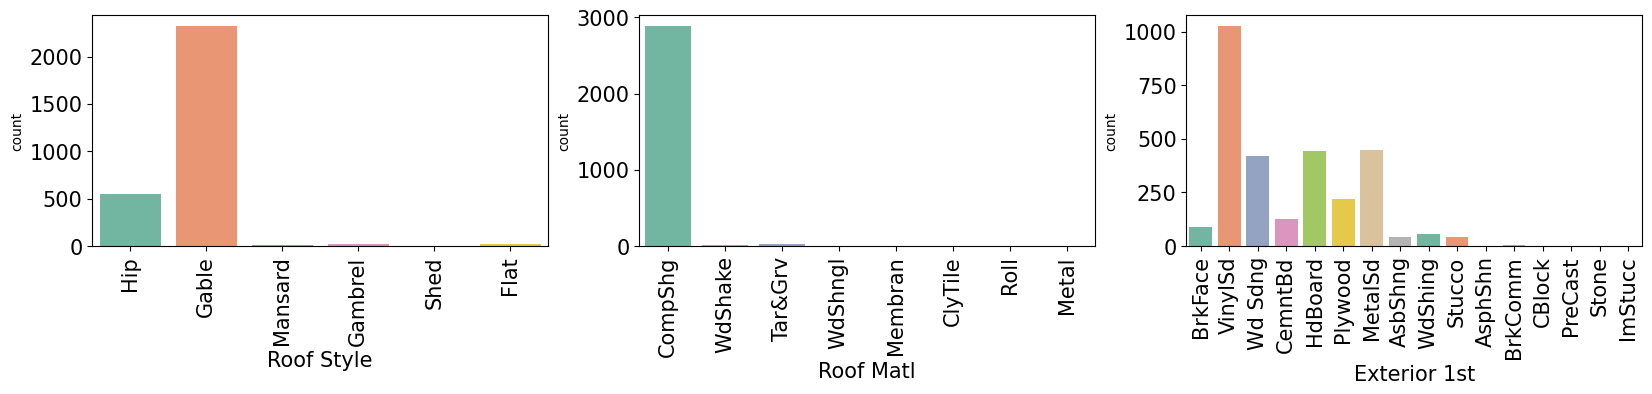

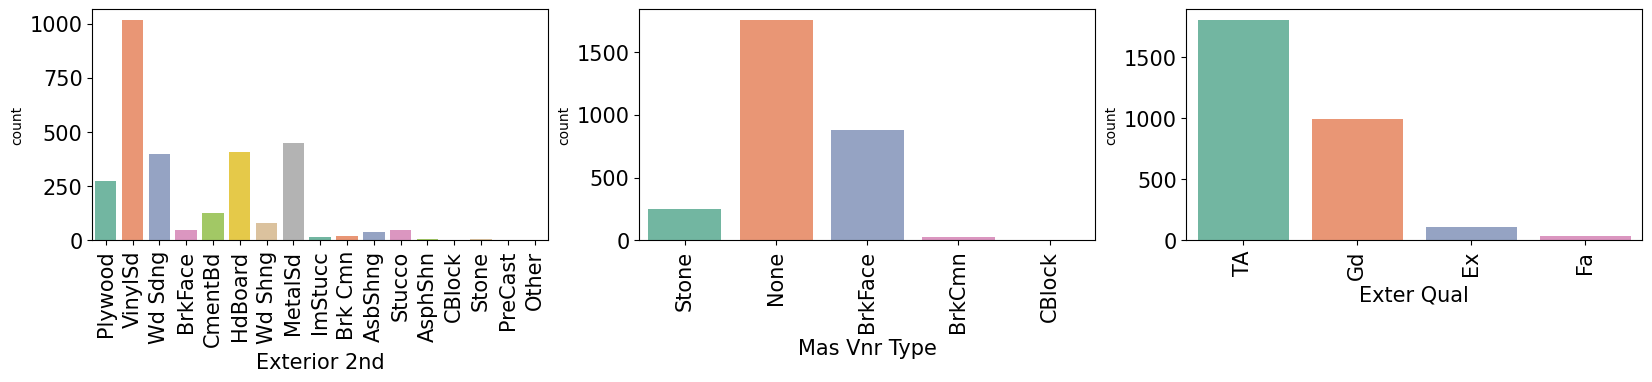

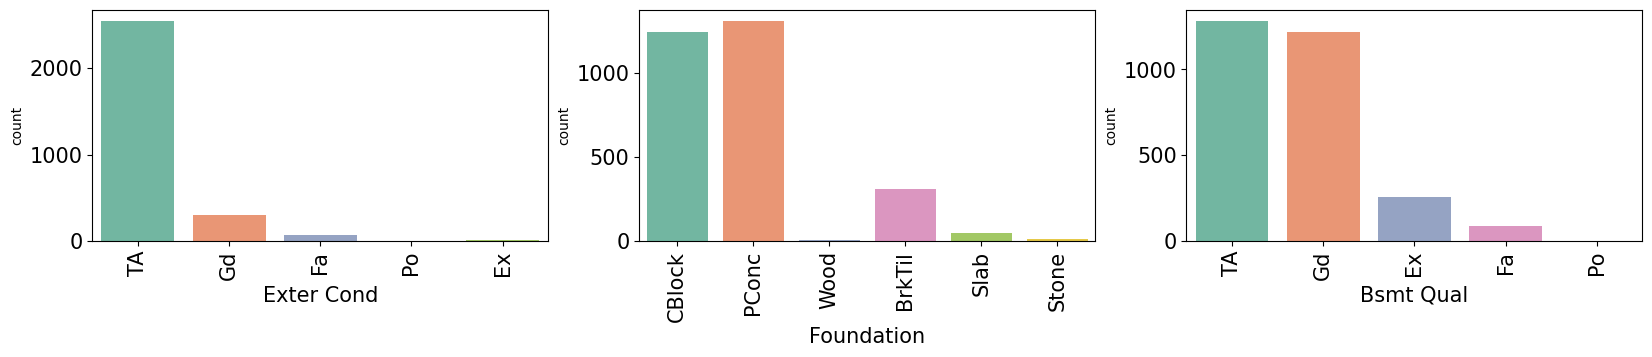

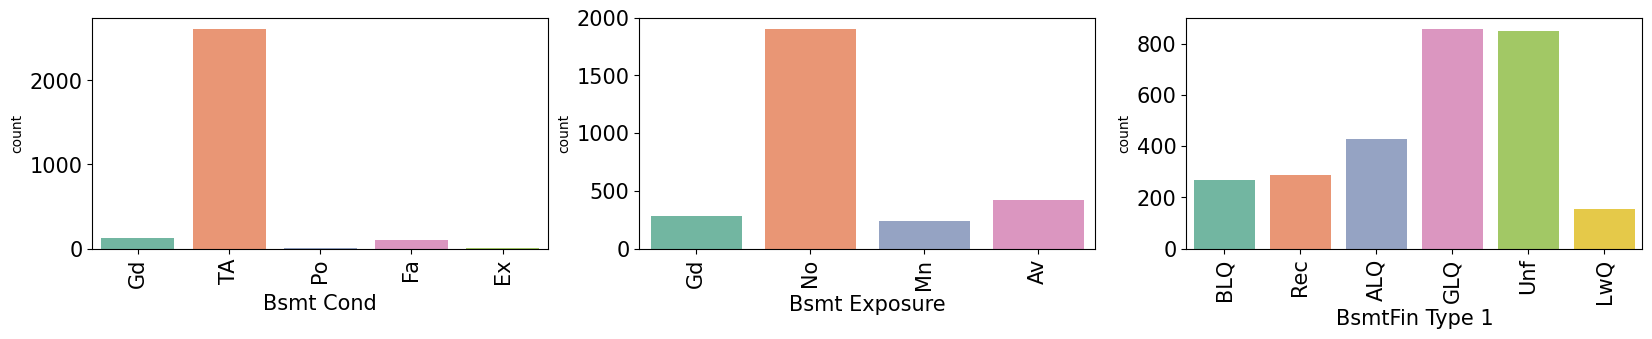

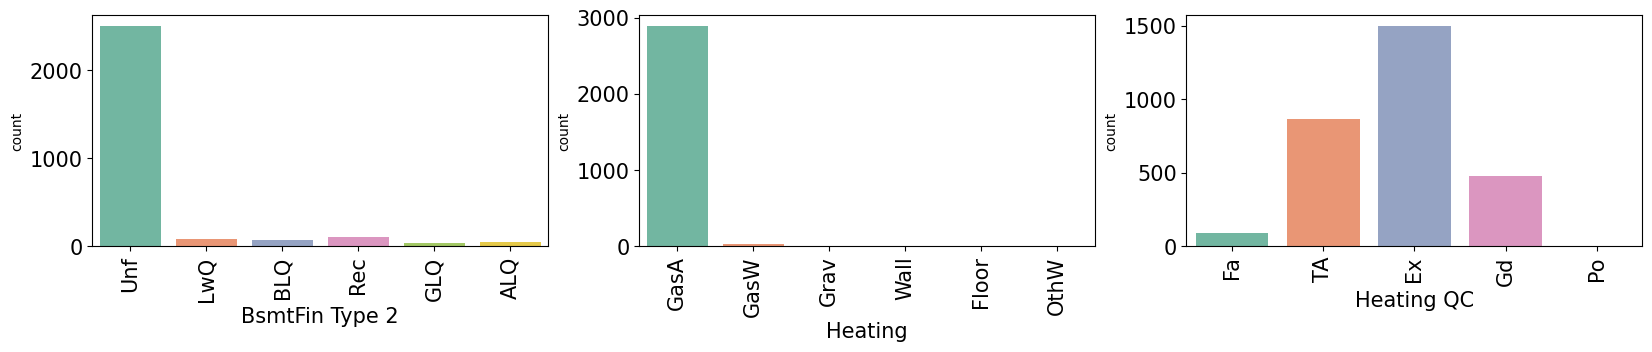

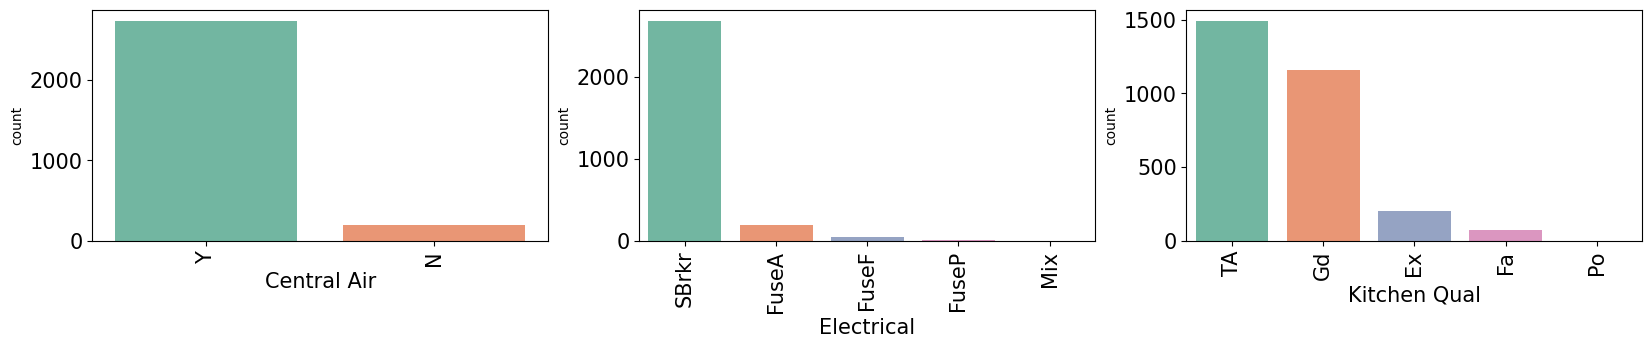

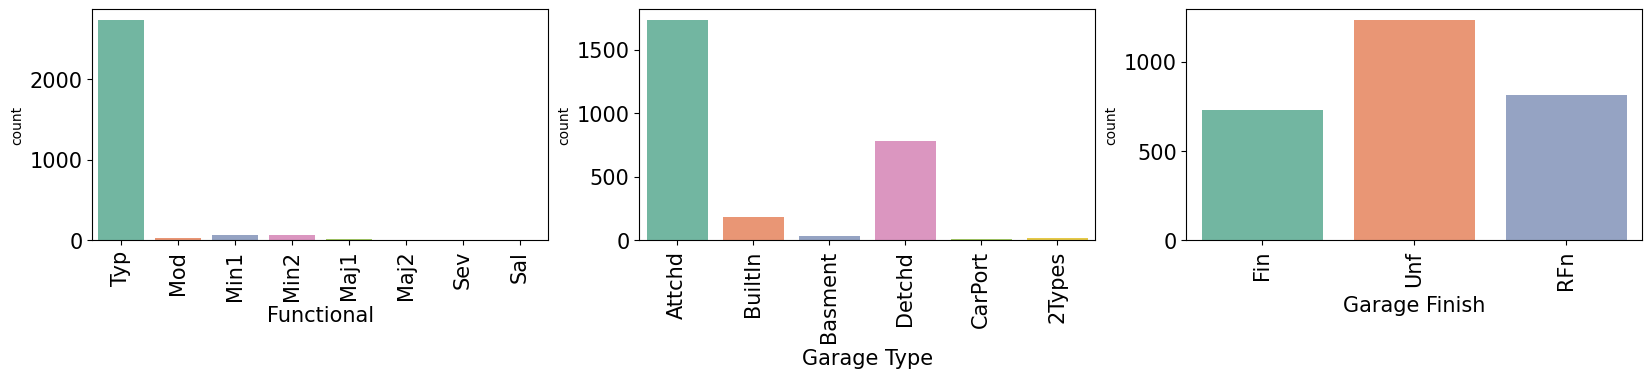

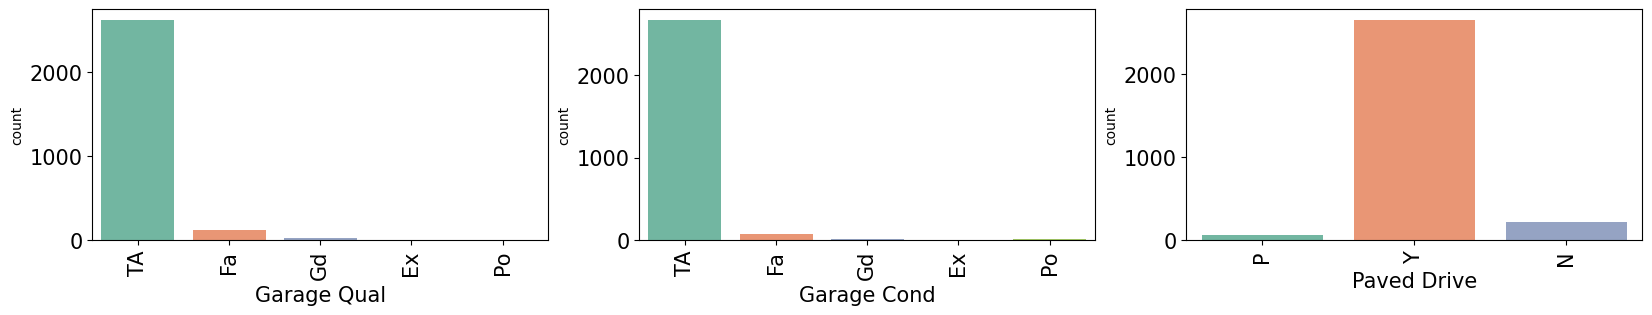

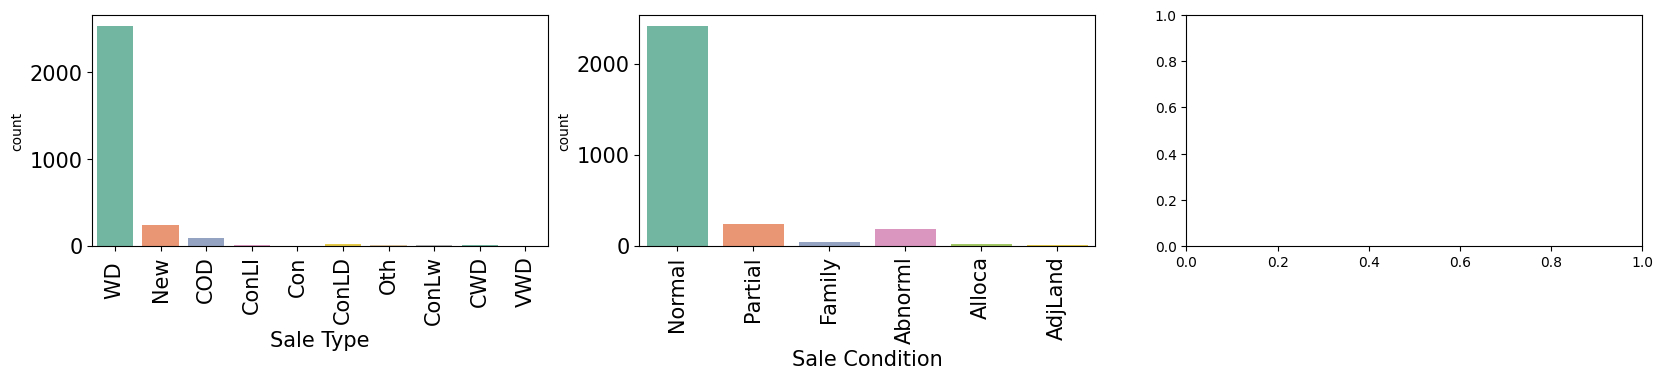

In [165]:
Categorical = df[['MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition']]

# Loop through columns and create subplots
for i, column in enumerate(Categorical.columns):
    if i % 3 == 0:
        fig, axes = plt.subplots(1, 3, figsize=(20, 3))

    sns.countplot(x=column, data=df, palette='Set2', ax=axes[i % 3])
    axes[i % 3].set_xlabel(column, fontsize=15)
    axes[i % 3].tick_params(axis='x', rotation=90)
    axes[i % 3].tick_params(axis='both', labelsize=15)

    if (i + 1) % 3 == 0 or i == len(Categorical.columns) - 1:
        plt.show()

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


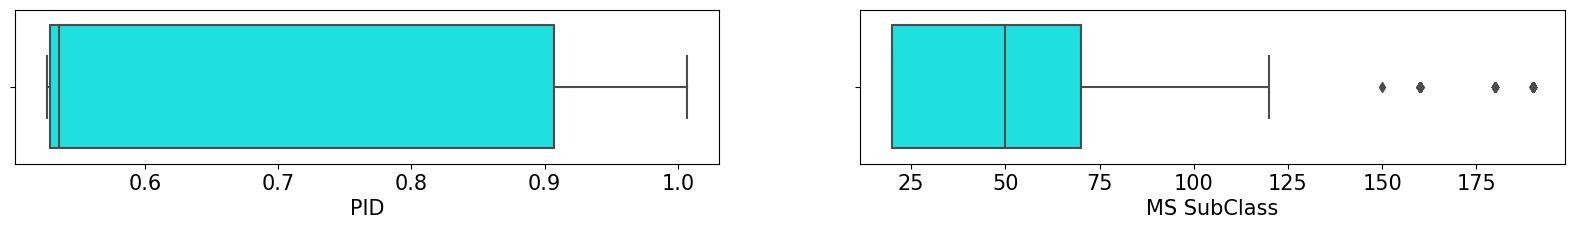

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


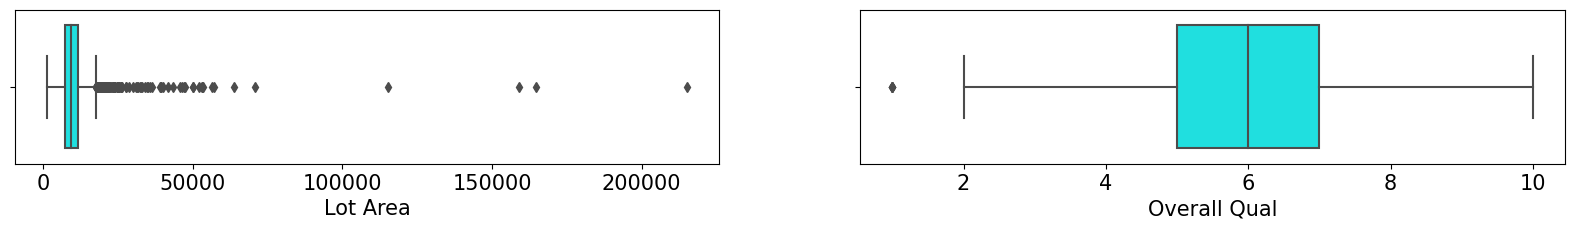

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


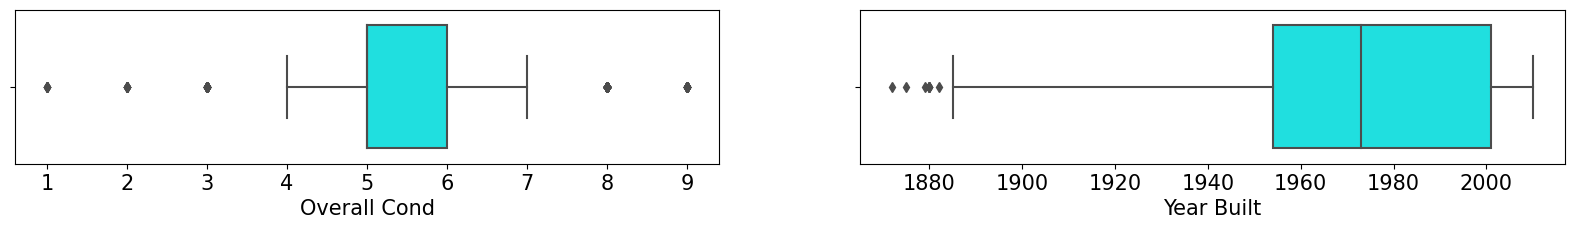

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


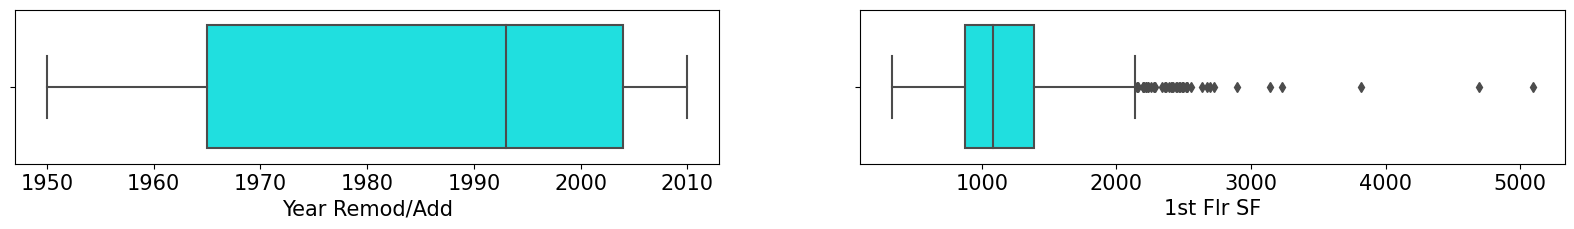

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


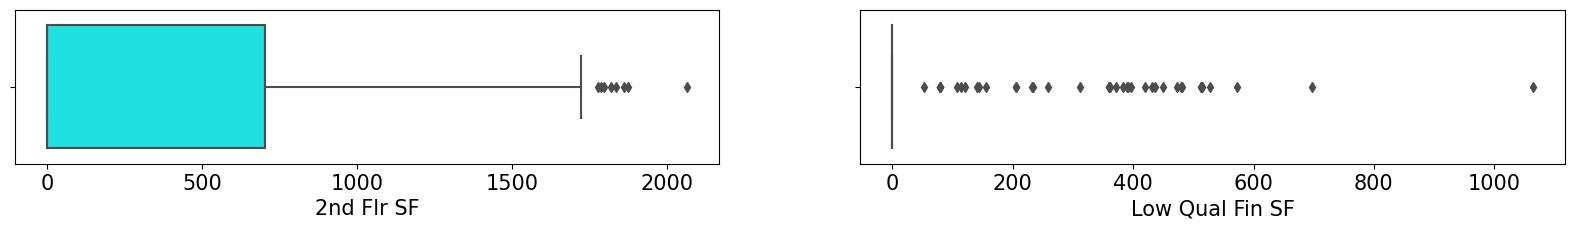

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


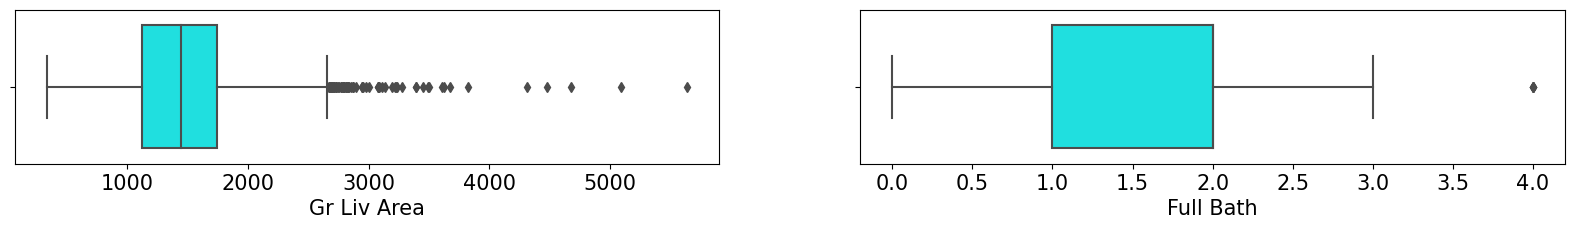

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


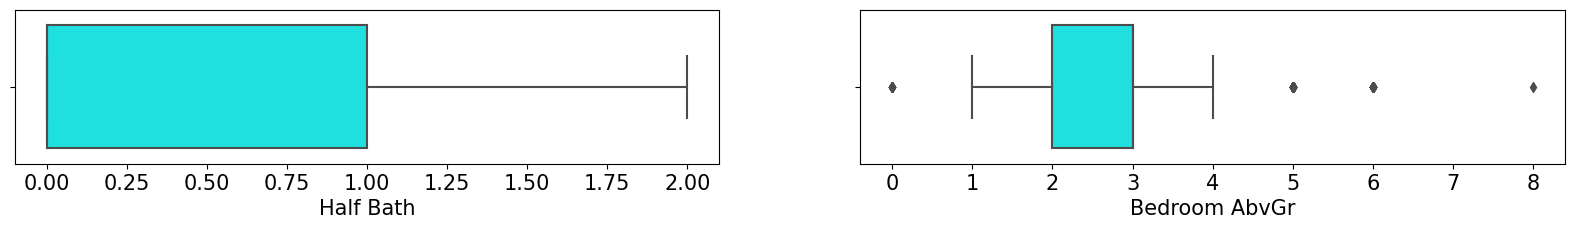

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


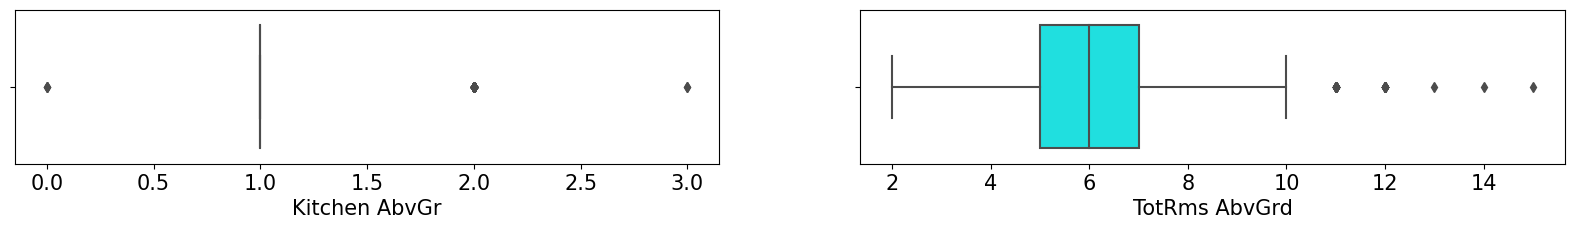

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


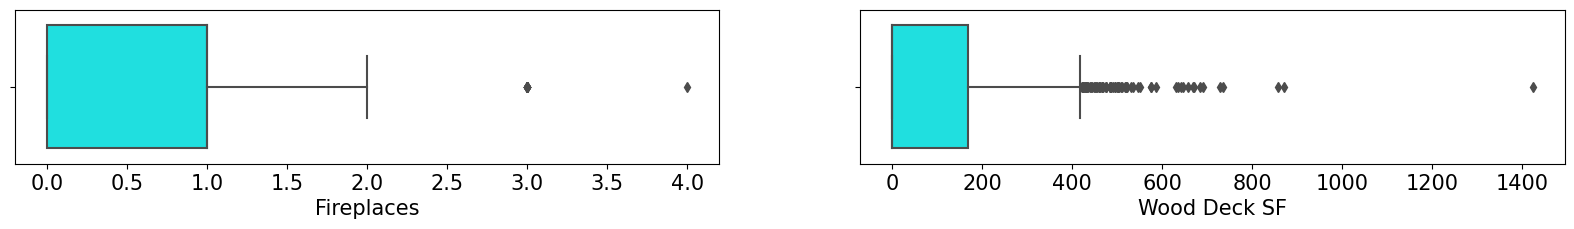

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


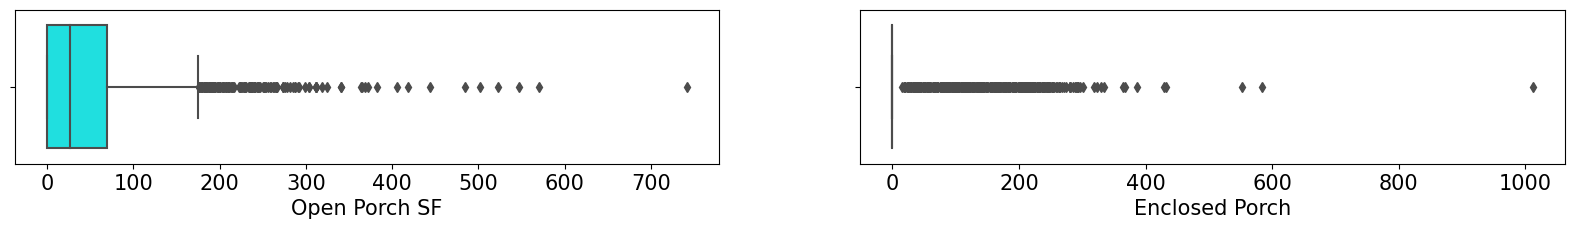

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


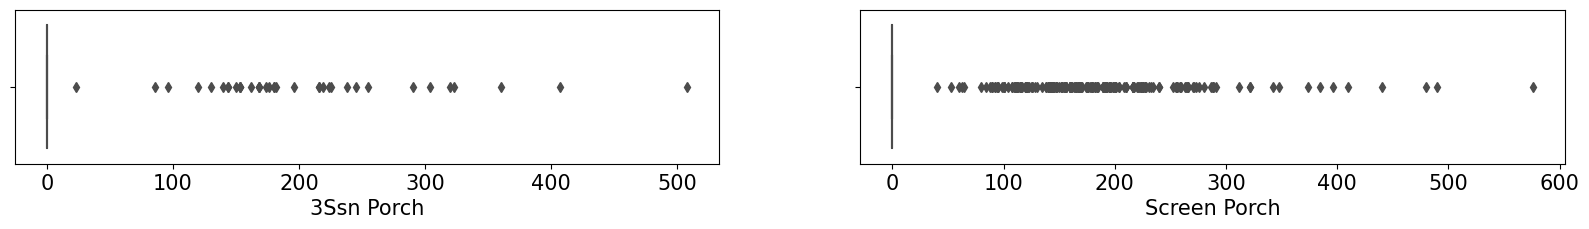

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


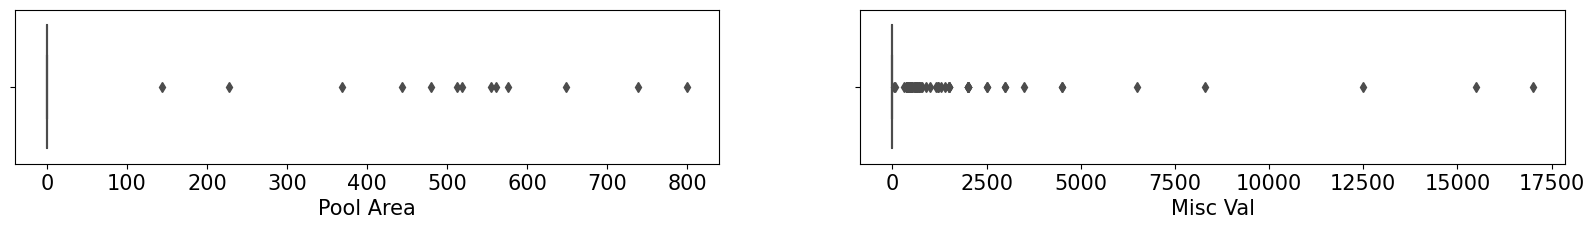

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
<ipython-input-166-cba0b25012eb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)


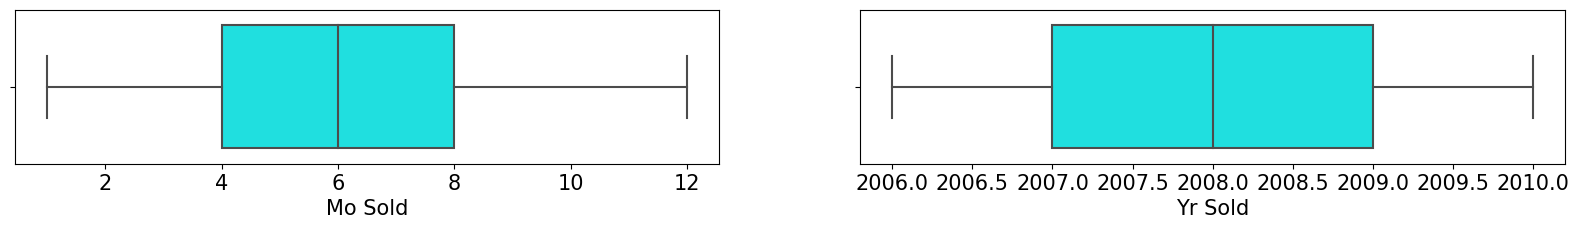

<ipython-input-166-cba0b25012eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)


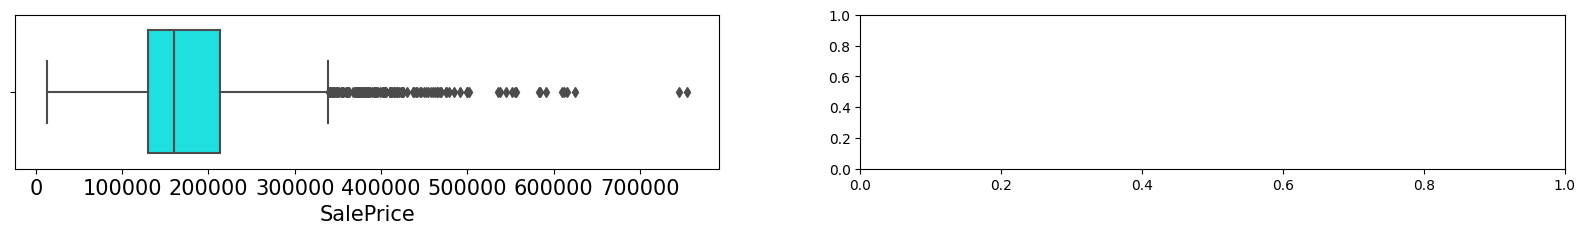

In [166]:
Numerical = df[int_columns]

for i in range(0, len(Numerical.columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=[20, 2])

    sns.boxplot(x=Numerical.columns[i], data=Numerical, color='cyan', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)
    axes[0].set_xlabel(Numerical.columns[i], fontsize=15)

    if i + 1 < len(Numerical.columns):
        sns.boxplot(x=Numerical.columns[i + 1], data=Numerical, color='cyan', ax=axes[1])
        axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)
        axes[1].set_xlabel(Numerical.columns[i + 1], fontsize=15)

    plt.show()

<ipython-input-167-85215f842526>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


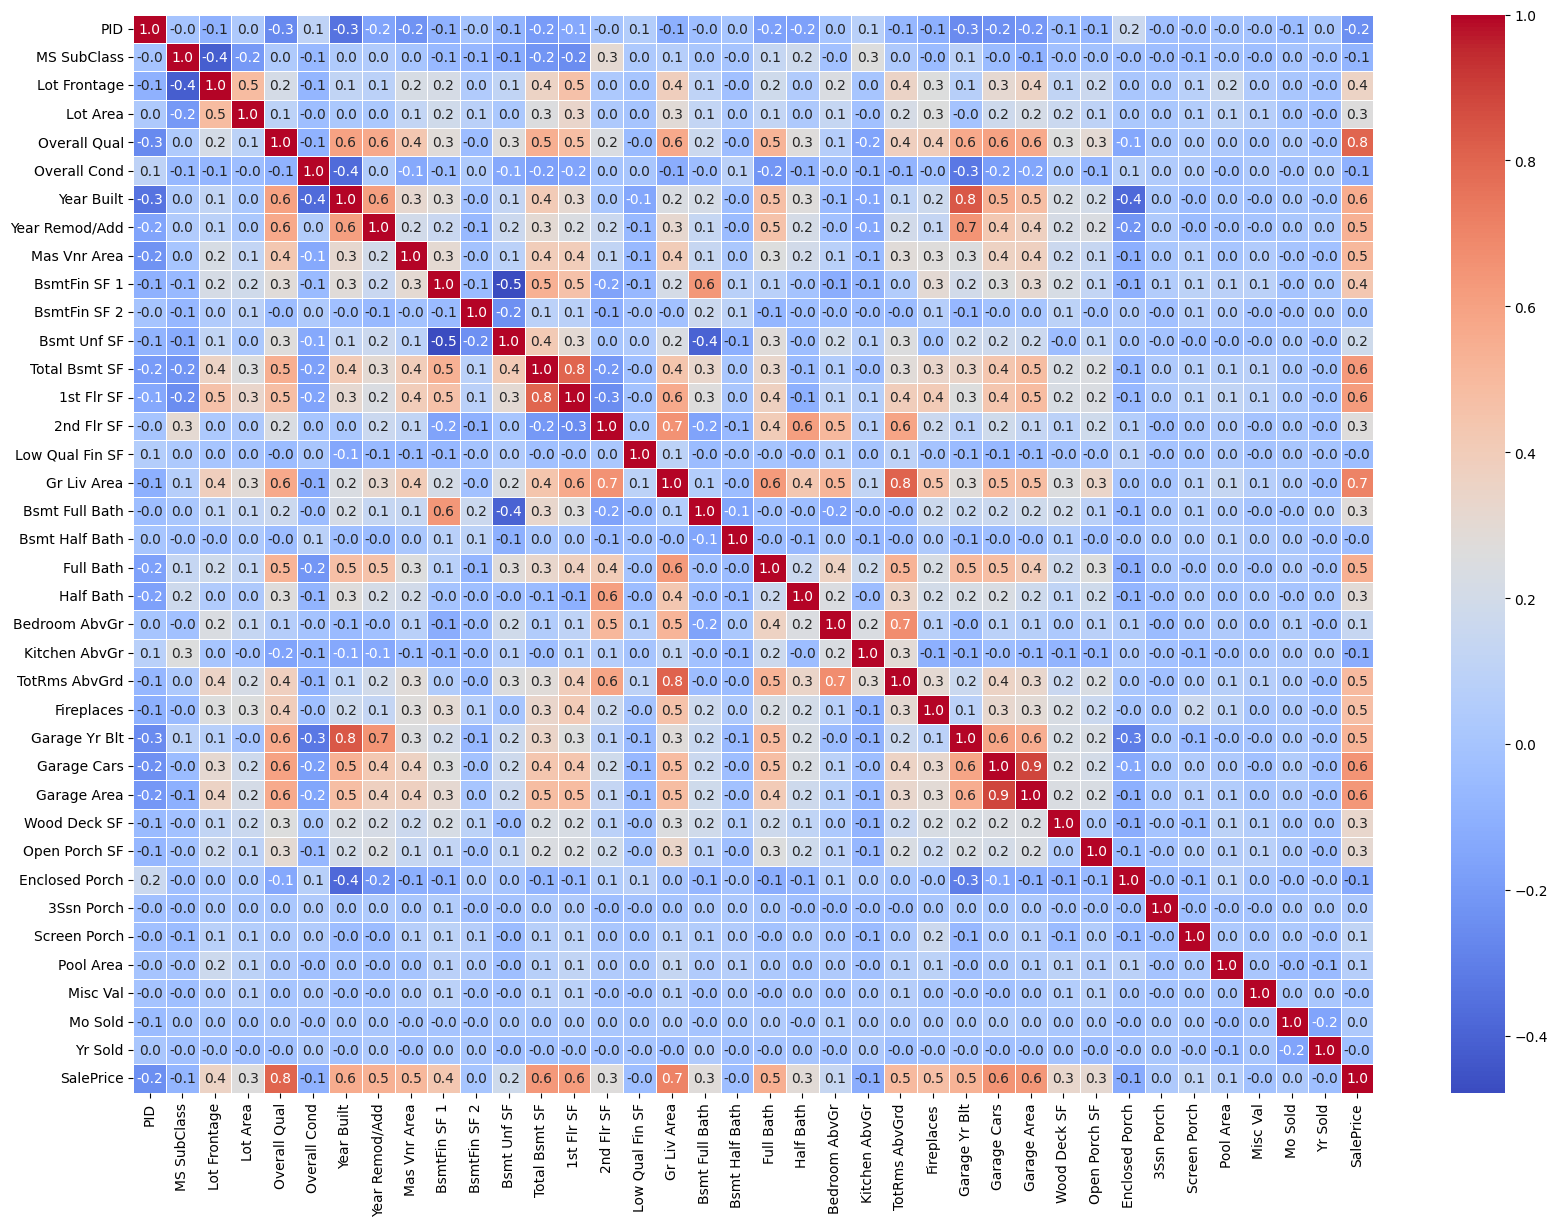

In [167]:
# Set the display options to show all columns (optional)
pd.set_option('display.max_columns', None)

# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure with a larger figsize
plt.figure(figsize=(20, 14))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

# Show the plot
plt.show()

# Reset the display options to the default (optional)
pd.reset_option('display.max_columns')


In [168]:
# Drop columns with low correlations with sale price and a significant number of outliers
droping = ['Misc Val', 'Pool Area', 'Screen Porch', '3Ssn Porch',
           'Enclosed Porch', 'Kitchen AbvGr', 'Low Qual Fin SF', 'Lot Area']
df.drop(droping, axis=1, inplace=True)

In [169]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Pav

In [170]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,P,210,62,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,140,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,393,36,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,212,34,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,TA,TA,Y,120,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,Pave,IR1,Low,AllPub,Inside,Mod,...,TA,TA,Y,164,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,Y,80,32,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,Pave,Reg,Lvl,AllPub,Inside,Mod,...,TA,TA,Y,240,38,4,2006,WD,Normal,170000


In [171]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


Lot Frontage      490
Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin SF 1        1
BsmtFin Type 2     81
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64


In [172]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

nan_percent= missing_percent(df)
nan_percent

Bsmt Unf SF        0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
dtype: float64

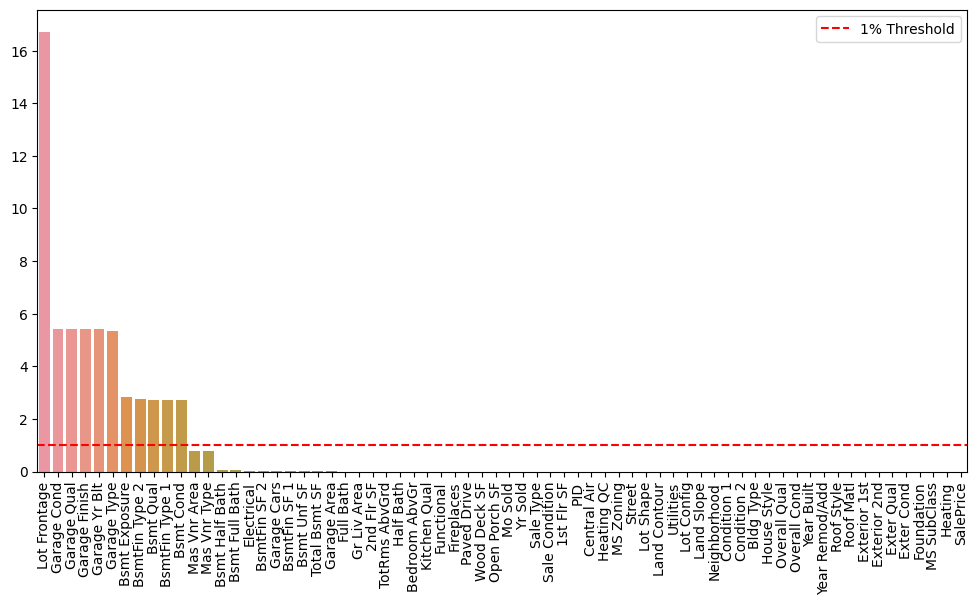

In [173]:
# Calculate the percentage of missing values for each feature
nan_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

# Set 1% threshold:
plt.axhline(y=1, color='r', linestyle='--', label='1% Threshold')
plt.legend()

# Show the plot
plt.show()


In [174]:
df[df['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,916386080,80,RL,73.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,100,0,5,2008,WD,Normal,167500


In [175]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,910201180,70,RM,50.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,Y,174,0,3,2007,WD,Alloca,150909


In [176]:
df[df['Total Bsmt SF'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,Pave,IR1,Lvl,AllPub,FR3,Gtl,...,TA,TA,Y,0,0,4,2008,ConLD,Abnorml,79000


In [177]:
df[df['Bsmt Half Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,Pave,IR1,Lvl,AllPub,FR3,Gtl,...,TA,TA,Y,0,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,372,7,2008,WD,Normal,284700


In [178]:
df[df['Bsmt Full Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,Pave,IR1,Lvl,AllPub,FR3,Gtl,...,TA,TA,Y,0,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,372,7,2008,WD,Normal,284700


In [179]:
# Drop rows containing missing values in columns with 1 or 2 missing values
rows_to_drop = ['BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
                'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
df= df.dropna(axis=0, subset=rows_to_drop)

In [180]:
numerical_columns = df[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 2',
                         'Total Bsmt SF', 'Garage Yr Blt']]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Garage Yr Blt']] = imputer.fit_transform(numerical_columns)


<ipython-input-180-a829e37eb4af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 2',


In [181]:
categorical_columns = df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                           'Electrical', 'Garage Type', 'Garage Finish',
                           'Garage Cond', 'Garage Qual', 'BsmtFin Type 2', 'BsmtFin Type 1']]

# Initializing SimpleImputer to fill missing values with the most frequent value in each column
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'Electrical', 'Garage Type', 'Garage Finish', 'Garage Cond', 'Garage Qual',
    'BsmtFin Type 2', 'BsmtFin Type 1']] = imputer.fit_transform(categorical_columns)


<ipython-input-181-8371c4a0ba6f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',


In [182]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


Categorical columns: Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')
Numerical columns: Index(['PID', 'MS SubClass', 'Lot Frontage', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath

In [183]:
df_dummies = pd.get_dummies(df, columns=categorical_columns)

In [184]:
df_dummies

,PID,MS SubClass,Lot Frontage,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.000000,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,526350040,20,80.000000,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
2,526351010,20,81.000000,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,526353030,20,93.000000,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,527105010,60,74.000000,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,37.000000,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2926,923276100,20,69.196634,5,5,1983,1983,0.0,301.0,324.0,...,0,0,0,1,0,0,0,0,1,0
2927,923400125,85,62.000000,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2928,924100070,20,77.000000,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

# Decision Tree Regression
tree_reg_model = DecisionTreeRegressor(random_state=42)
tree_reg_model.fit(X_train, y_train)
tree_reg_predictions = tree_reg_model.predict(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Calculate evaluation metrics
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)

tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_rmse = mean_squared_error(y_test, tree_reg_predictions, squared=False)

svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

# Display the results in a table with changed rows and columns
table_data = [
    ["Model", "Linear Regression", "Decision Tree Regression", "Support Vector Regression"],
    ["MAE", f"{linear_reg_mae:.1f}", f"{tree_reg_mae:.1f}", f"{svr_mae:.1f}"],
    ["MSE", f"{linear_reg_mse:.1f}", f"{tree_reg_mse:.1f}", f"{svr_mse:.1f}"],
    ["RMSE", f"{linear_reg_rmse:.1f}", f"{tree_reg_rmse:.1f}", f"{svr_rmse:.1f}"]
]

headers = table_data[0]

# Print the table
print(tabulate(table_data[1:], headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

╒═════════╤═════════════════════╤════════════════════════════╤═════════════════════════════╕
│  Model  │  Linear Regression  │  Decision Tree Regression  │  Support Vector Regression  │
╞═════════╪═════════════════════╪════════════════════════════╪═════════════════════════════╡
│   MAE   │       15934.2       │          22939.9           │           57462.8           │
├─────────┼─────────────────────┼────────────────────────────┼─────────────────────────────┤
│   MSE   │     8.10062e+08     │        1.19658e+09         │         6.95376e+09         │
├─────────┼─────────────────────┼────────────────────────────┼─────────────────────────────┤
│  RMSE   │       28461.6       │          34591.5           │           83389.2           │
╘═════════╧═════════════════════╧════════════════════════════╧═════════════════════════════╛


In [186]:
r2 = r2_score(y_test, linear_reg_predictions)
print(f'R-squared: {r2}')

R-squared: 0.8742950497043661


In [187]:
metrics.r2_score(y_test, linear_reg_predictions)

0.8742950497043661

In [188]:
print('MAE:', metrics.mean_absolute_error(y_test, linear_reg_predictions))

MAE: 15934.158448127464


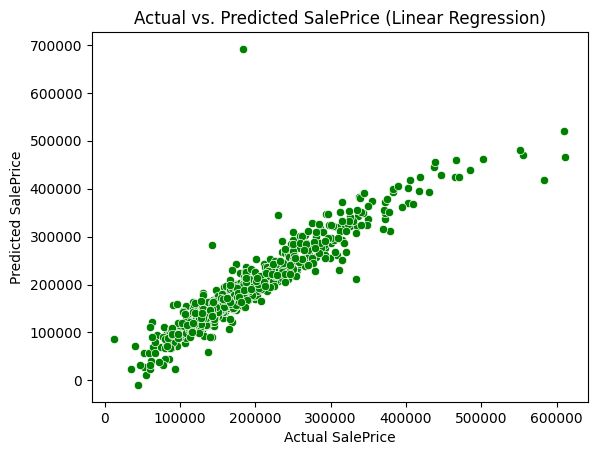

In [189]:
# Create a DataFrame for visualization
results = pd.DataFrame({'Actual': y_test, 'Predicted': linear_reg_predictions})

# Visualize predicted vs. actual values with Seaborn
sns.scatterplot(x='Actual', y='Predicted', data=results, color='green')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (Linear Regression)')
plt.show()

<ipython-input-190-b97a30884868>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50);


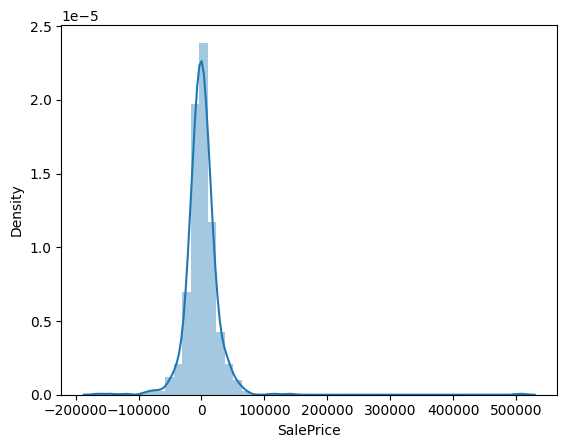

In [190]:
residual = linear_reg_predictions - y_test
sns.distplot(residual,bins=50);